In [26]:
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("complete_cleaned_data CSV.csv")

In [34]:
label = LabelEncoder()
a = label.fit_transform(df['Label'])
df['num_label'] = a
df = df.sample(frac=1)

In [35]:
x=df['Text']
y=df['num_label']

In [36]:
#Neural Network
max_words = 20000
max_length = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
x1 = pad_sequences(sequences, maxlen=max_length)

In [39]:
#Building the Neural Network
model = Sequential() 
model.add(Embedding(max_words, 32, input_length=max_length)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 32)           640000    
                                                                 
 flatten_8 (Flatten)         (None, 16000)             0         
                                                                 
 dense_15 (Dense)            (None, 128)               2048128   
                                                                 
 dense_16 (Dense)            (None, 4)                 516       
                                                                 
Total params: 2,688,644
Trainable params: 2,688,644
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Fitting the Neural Network
hist = model.fit(x1, to_categorical(y), validation_split=0.2, epochs=50, batch_size=20)

Epoch 1/50
31/31 [==============================] - 2s 45ms/step - loss: 1.4238 - accuracy: 0.2301 - val_loss: 1.3972 - val_accuracy: 0.2258
Epoch 2/50
31/31 [==============================] - 1s 38ms/step - loss: 1.3673 - accuracy: 0.3452 - val_loss: 1.3900 - val_accuracy: 0.2258
Epoch 3/50
31/31 [==============================] - 1s 38ms/step - loss: 1.2902 - accuracy: 0.3841 - val_loss: 1.3055 - val_accuracy: 0.2839
Epoch 4/50
31/31 [==============================] - 1s 36ms/step - loss: 1.0476 - accuracy: 0.6467 - val_loss: 1.1621 - val_accuracy: 0.4258
Epoch 5/50
31/31 [==============================] - 1s 37ms/step - loss: 0.7657 - accuracy: 0.7974 - val_loss: 1.0265 - val_accuracy: 0.5742
Epoch 6/50
31/31 [==============================] - 1s 45ms/step - loss: 0.5372 - accuracy: 0.8995 - val_loss: 0.9451 - val_accuracy: 0.5742
Epoch 7/50
31/31 [==============================] - 2s 54ms/step - loss: 0.3320 - accuracy: 0.9352 - val_loss: 0.8167 - val_accuracy: 0.6903
Epoch 8/50
31

[]

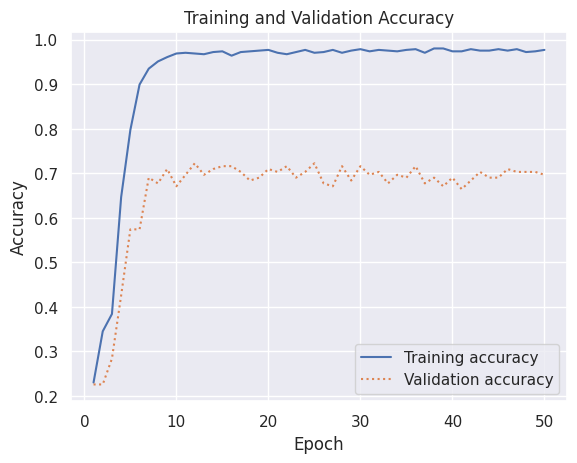

In [41]:
#Plotting 
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()